In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [52]:
url = "Heart disease.csv"
X = pd.read_csv(url)

In [53]:
type(X)

pandas.core.frame.DataFrame

In [54]:
X.shape

(3390, 17)

In [55]:
X

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# 2-Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционная матрица ...)

In [56]:
X.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

0 - id - количественный признак

1 - возраст пациента (age) - количественный признак

2 - образование (education) - количественный признак

3 - пол (sex) - категориальный признак

4 - курящий/не курящий (is_smoking) - категориальный признак

5 - количество сигарет, которое человек выкуривает в среднем за один день (cigsPerDay) - количественный признак

6 - принимал ли пациент лекарства от артериального давления (BPMeds) - бинарный признак

7 - был ли у пациента ранее инсульт (PrevalentStroke) - бинарный признак

8 - была ли у пациента гипертоническая болезнь (prevalentHyp) - бинарный признак

9 - был ли у пациента диабет (diabetes) - бинарный признак

10 - уровень общего холестерина (totChol) - количественный признак

11 - систолическое артериальное давление (sysBP) - количественный признак

12 - диастолическое артериальное давление (diaBP) - количественный признак

13 - индекс массы тела (BMI) - количественный признак

14 - частота сердечных сокращений (heartRate) - количественный признак

15 - глюкоза (glucose) - количественный признак

16 - 10-летний риск ишемической болезни сердца ИБС (TenYearCHD) - бинарный признак (двоичный: «1» означает «Да», «0» означает «Нет»)

Всего : 10 - количественных признаков, 2 - категориальных признака, 5 - бинарных признаков

In [57]:
X.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [58]:
X['sex'] = X['sex'].astype('category')
X['is_smoking'] = X['is_smoking'].astype('category')

In [59]:
X.describe(include=['category'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [60]:
X['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

## Построение корреляционной матрицы

In [61]:
corr_mat = X.corr()
corr_mat

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


<AxesSubplot:>

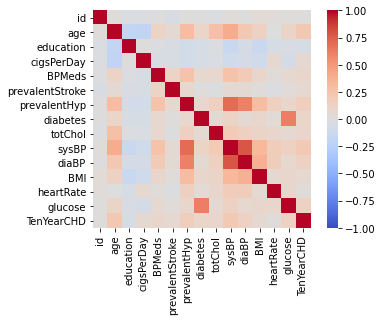

In [62]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

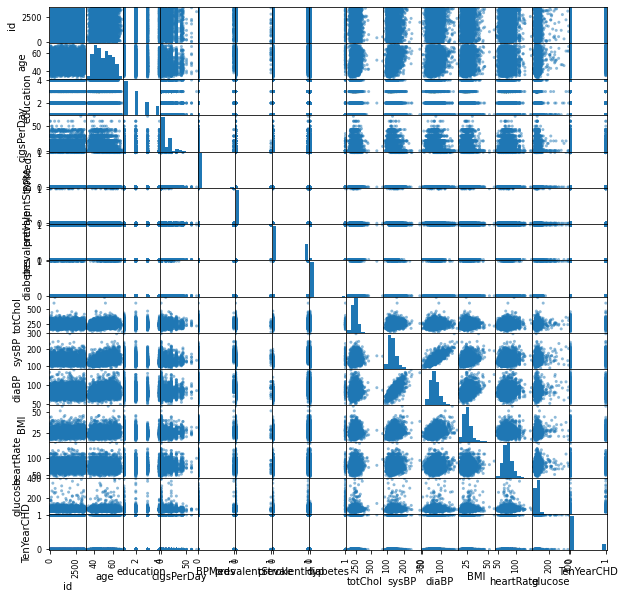

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha = .5, figsize = (10, 10))
pass

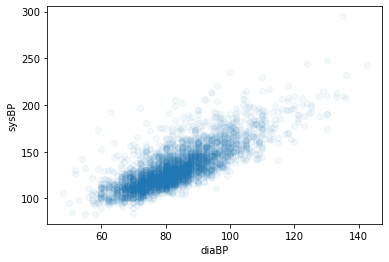

In [64]:
plt.scatter(X['diaBP'], X['sysBP'], alpha=0.05)
plt.xlabel('diaBP')
plt.ylabel('sysBP')
pass

### Между количественным признаком  'diaBP' и 'sysBP' наблюдается линейная  зависимость. Коэффициент корреляции = 0.781908

# 3-Обработка пропущенных значений

In [65]:
X.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Заполним пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Приступим с обработки количественных признаков

In [66]:
X.fillna(X.median(axis = 0), axis=0 , inplace=True)

In [67]:
X.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Избавление от пропущенных значений завершено

In [68]:
X

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# 4-Обработка категориальных признаков

In [69]:
X.describe(include=['category'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [70]:
X['sex'] == 'male'

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Name: sex, Length: 3390, dtype: bool

Поскольку каждый из категориальных признаков принимает лишь 2 значения. Метод биниризации для большего числа кодирования значений не потребуется. Достаточно закодировать значение '0' или '1'

In [71]:
X['sex'] = pd.factorize(X['sex'])[0]
X['is_smoking'] = pd.factorize(X['is_smoking'])[0]

In [72]:
X.loc[:,['sex', 'is_smoking']]

,sex,is_smoking
0,0,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
3385,0,1
3386,0,1
3387,1,0
3388,1,1


Для признака 'sex' Fmale - '0', Male - '1' ; 'is_smoking'  YES - '0', NO -'1'

In [73]:
X.describe()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.971681,0.432743,0.502360,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.005925,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# 5-Нормализация количественных признаков
Метод стандартизации

In [74]:
X_stand = (X - X.mean(axis = 0))/X.std(axis = 0)

In [75]:
X_stand.describe()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03
mean,3.582844e-17,5.649365e-17,-4.347227e-16,5.868790e-17,1.397113e-16,2.156911e-16,-1.833997e-18,1.051036e-15,-1.621450e-16,-2.936032e-17,-2.014121e-16,-1.938142e-16,2.330650e-16,8.088319e-15,4.053460e-16,1.088117e-16,-8.285735e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731285e+00,-2.041479e+00,-9.659577e-01,-8.732958e-01,-1.004583e+00,-7.595669e-01,-1.743163e-01,-8.080928e-02,-6.785584e-01,-1.622711e-01,-2.890146e+00,-2.202634e+00,-2.901219e+00,-2.394251e+00,-2.587861e+00,-1.801286e+00,-4.212361e-01
25%,-8.656423e-01,-8.777249e-01,-9.659577e-01,-8.732958e-01,-1.004583e+00,-7.595669e-01,-1.743163e-01,-8.080928e-02,-6.785584e-01,-1.622711e-01,-6.898627e-01,-6.998546e-01,-6.972164e-01,-6.728107e-01,-6.664090e-01,-4.196687e-01,-4.212361e-01
50%,0.000000e+00,-6.309677e-02,2.815177e-02,-8.732958e-01,9.951445e-01,-7.595669e-01,-1.743163e-01,-8.080928e-02,-6.785584e-01,-1.622711e-01,-6.756032e-02,-1.839752e-01,-7.344221e-02,-1.006204e-01,-8.161920e-02,-1.606155e-01,-4.212361e-01
75%,8.656423e-01,7.515313e-01,1.022261e+00,1.144750e+00,9.951445e-01,9.263702e-01,-1.743163e-01,-8.080928e-02,1.473278e+00,-1.622711e-01,5.991922e-01,5.113406e-01,5.919170e-01,5.367021e-01,5.867120e-01,1.416132e-01,-4.212361e-01
max,1.731285e+00,2.380788e+00,2.016371e+00,1.144750e+00,9.951445e-01,5.141213e+00,5.735006e+00,1.237117e+01,1.473278e+00,6.160708e+00,1.020043e+01,7.285062e+00,4.958337e+00,7.549685e+00,5.599196e+00,1.348285e+01,2.373265e+00


# 6 - Отбор признаков

Перед тем как вызывать метод машинного обучения необходимо произвести отбор признаков, а также сформировать матрицу с входными признаками и столбец с выходным признаком.

In [76]:
X_stand.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Для предсказания используем все входные признаки, кроме id. Поскольку он не имеет никакой особой значимости.

In [77]:
M = X_stand.drop(['TenYearCHD', 'id'], axis=1)
Y = X['TenYearCHD']
M.shape

(3390, 15)

# 7 - Разбиение данных на обучуающую и тестовую выборки

Разобьем данные в пропорции 3:1 (75% - обучающая, 25% - тестовая):

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(M, Y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

N_train, N_test

(2542, 848)

# 8 - Примение алгоритма KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'error')

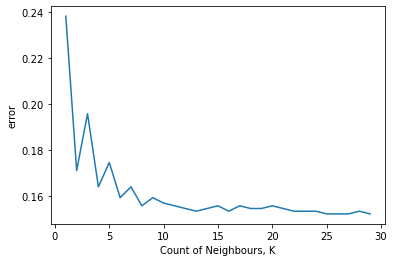

In [80]:
errors=[]
K=np.arange(1,30)
for k in K:
    model= KNeighborsClassifier(k)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    error= np.mean(pred!=y_test)
    errors.append(error)

plt.plot(K,errors)
plt.xlabel('Count of Neighbours, K')
plt.ylabel('error')

In [81]:
model= KNeighborsClassifier(13)
model.fit(X_train,y_train)
pred= model.predict(X_test)
correct= np.mean(pred!=y_test)
print(correct)

0.15330188679245282


## Ошибка предсказания на тестовой выборке в целом равна 15% (при  K=13)

In [124]:
y_test_pred = model.predict(X_test)
np.mean(y_train == y_train_pred)

0.8544453186467349

## Предсказание выходного значения y_test по входным X_test  определяется  c вероятностью 85% ( при K = 13)

In [125]:
y_train_pred = model.predict(X_train)
np.mean(y_train == y_train_pred)

0.8544453186467349

## Предсказание выходного значения y_train по входным X_train  определяется  c вероятностью 85% ( при K = 13)

### В заключении можно сказать о том, что модель, построенная с помощью алгоритма КNN, предсказывает достаточно корректно ( вероятность предсказания на тестовой выборке  и на на обучающей  выборке = 85%), что в целом является достаточно не плохим результатом

In [126]:
print (y_train.value_counts())

0    2161
1     381
Name: TenYearCHD, dtype: int64


In [127]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
np.mean(y_train_pred!=y_train)   # Ошибка на обучающей выборке

0.14555468135326516

In [129]:
np.mean(y_test_pred!=y_test) # Ошибка на тестовой выборке

0.15330188679245282

In [130]:
#from sklearn import sklearn.metrics.confusion_matrix
print(sk.metrics.confusion_matrix(y_test_pred, y_test))

[[711 123]
 [  7   7]]


([<matplotlib.axis.YTick at 0x24e497bd1f0>,
 [Text(0, 0, ''), Text(0, 0, '')])

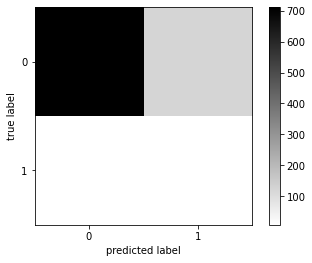

In [131]:
plt.imshow(sk.metrics.confusion_matrix(y_test_pred, y_test), 
           interpolation='nearest', cmap = plt.cm.binary)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.xticks([0, 1])
plt.yticks([0, 1])

In [132]:
from sklearn import neighbors
kk = [1, 5, 10, 13] + list(range(10, 201, 10))
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

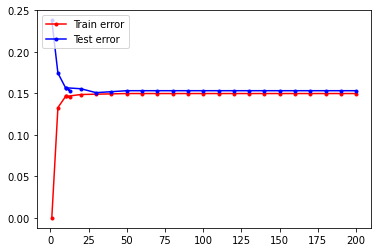

In [133]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

# Нейронные сети


In [144]:
from sklearn.neural_network import MLPClassifier

In [145]:
def try_combination(alpha, hidden_layer_sizes):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = hidden_layer_sizes,
                              solver = 'lbfgs', activation = 'logistic', random_state = 4)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    return (np.mean(y_train_pred != y_train), np.mean(y_test_pred != y_test))

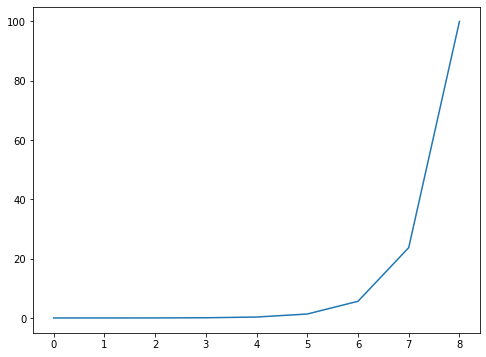

In [146]:
HL1_sizes = [X_train.shape[1]//2, X_train.shape[1], X_train.shape[1]*2]
HL2_sizes = [2, 8, 32]
alphas = np.logspace(-3, 2, 9)
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(range(9), alphas)

In [ ]:
results = [[[try_combination(alpha, (L1, L2)) for alpha in alphas] for L2 in HL2_sizes] for L1 in HL1_sizes]

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

In [485]:
min_iL1 = 0
min_iL2 = 0
min_ialpha = 0
min_test_err = 1
min_train_err = 1
for iL1, vL1 in enumerate(results):
    for iL2, vL2 in enumerate(vL1):
        curr_min_ialpha, curr_min_value = min(enumerate(vL2), key=(lambda x: x[1][1]))
        if (min_test_err > curr_min_value[1]):
            min_train_err = curr_min_value[0]
            min_test_err = curr_min_value[1]
            min_ialpha = curr_min_ialpha
            min_iL2 = iL2
            min_iL1 = iL1


print('Наименьшая ошибка на тестовой выборке: ',  min_test_err)
print('Соответствующая ошибка на обучающей выборке: ',  min_train_err)
print(f'Соответствующее количество нейронов в первом слое {HL1_sizes[min_iL1]}, втором {HL2_sizes[min_iL2]} и alpha {alphas[min_ialpha]}.')

Наименьшая ошибка на тестовой выборке:  0.14976415094339623
Соответствующая ошибка на обучающей выборке:  0.14673485444531864
Соответствующее количество нейронов в первом слое 15, втором 32 и alpha 5.623413251903491.


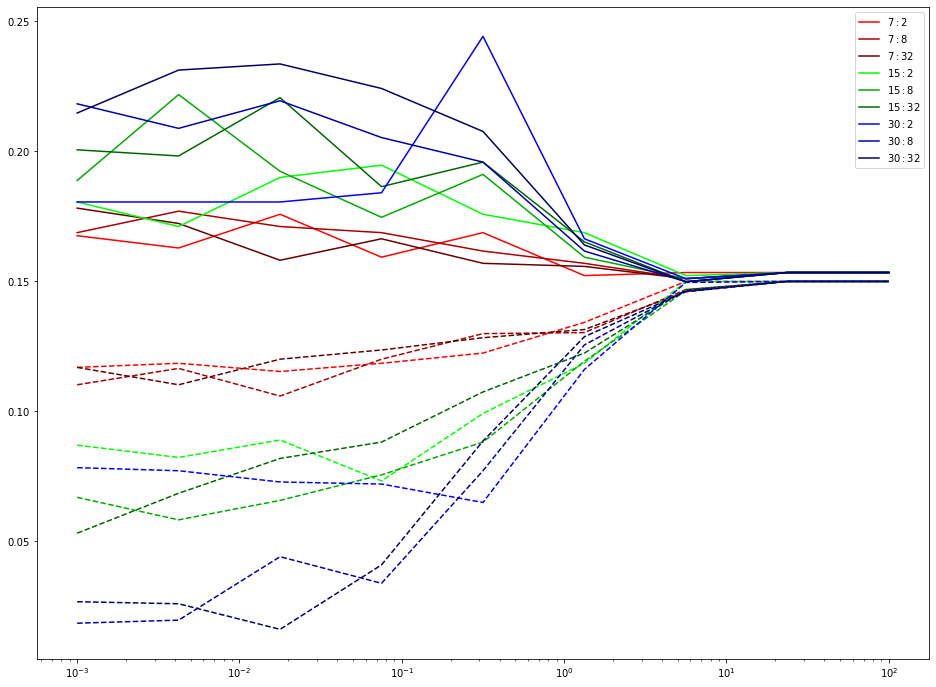

In [486]:
colors = [['#ff0000', '#aa0000', '#660000'], ['#00ff00', '#00aa00', '#006600'], ['#0000ff', '#0000aa', '#000066']]
plt.rcParams["figure.figsize"] = [16, 12]
axes = plt.gca()
axes.set_xscale('log', basex=10)

for i in range(len(HL1_sizes)):
    for j in range(len(HL2_sizes)):
        plt.plot(alphas, [train_err for train_err, _ in results[i][j]],
             color=colors[i][j], linestyle='dashed')
        plt.plot(alphas, [test_err for _, test_err in results[i][j]],
             color=colors[i][j], linestyle='solid',
             label=f'${HL1_sizes[i]}:${HL2_sizes[j]}')

plt.legend(loc='best')
plt.show()

На примере двухслойной нейронной сети при alpha < 5.6 наблюдается явное переобучение модели. Как только alpha проходит порог в 5.6  можем пронаблюдать, как ошибка на  тестовой выборке, так и ошибка на обучающей выборке ассимптотически приближаются к другу другу ( к 0.15). Это сведельствует о том, что обучение модели подобрано оптимально. Не наблюдаются никакого недообучения. Что касается проявления зависимости числа нейронов на ошибки обучающей и тестовой выборки, то это не так очевидно. При оптимальном alpha число нейронов  на первом слое -15, на втором- 32.

Перейдем к рассмотрению результатов с одним скрытым слоем

In [487]:
HL_sizes = HL2_sizes + HL1_sizes
results1 = [[try_combination(alpha, (L,)) for alpha in alphas] for L in HL_sizes]

In [488]:
min_iL = 0
min_ialpha = 0
min_test_err = 1
min_train_err = 1
for iL, vL in enumerate(results1):
        curr_min_ialpha, curr_min_value = min(enumerate(vL), key=(lambda x: x[1][1]))
        if (min_test_err > curr_min_value[1]):
            min_train_err = curr_min_value[0]
            min_test_err = curr_min_value[1]
            min_ialpha = curr_min_ialpha
            min_iL = iL

print('Наименьшая ошибка на тестовой выборке: ',  min_test_err)
print('Соответствующая ошибка на обучающей выборке: ',  min_train_err)
print(f'Соответствующее количество нейронов {HL_sizes[min_iL]} и alpha {alphas[min_ialpha]}.')

Наименьшая ошибка на тестовой выборке:  0.14504716981132076
Соответствующая ошибка на обучающей выборке:  0.14201416207710466
Соответствующее количество нейронов 30 и alpha 5.623413251903491.


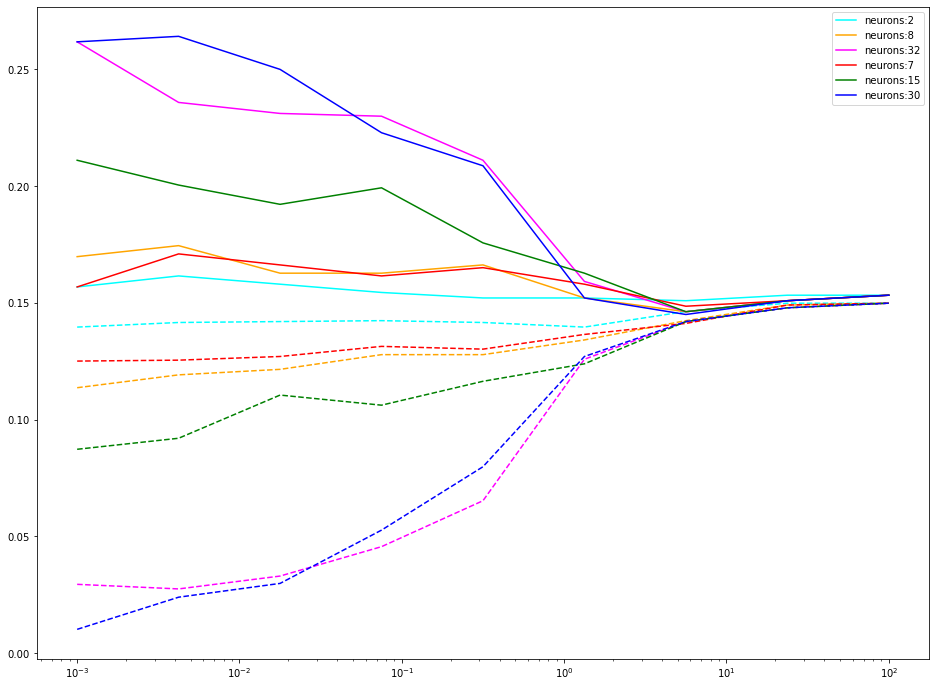

In [489]:
colors1 = ['cyan', 'orange', 'magenta', 'red', 'green', 'blue']
plt.rcParams["figure.figsize"] = [16, 12]
axes = plt.gca()
axes.set_xscale('log', basex=10)

for i in range(len(HL_sizes)):
    plt.plot(alphas, [train_err for train_err, _ in results1[i]],
             color=colors1[i], linestyle='dashed')
    plt.plot(alphas, [test_err for _, test_err in results1[i]],
             color=colors1[i], linestyle='solid', label=f'neurons:{HL_sizes[i]}')

plt.legend(loc='best')
plt.show()

При получении результатов, мы можем пронаблюдать, что наибольшая разница между ошибками на обучающей и тестовой выборках  достигается при 30 нейронах с наименьшим alpha < 0,001 . Но при увеличении alpha разница  постепенно уменьшается и ошибки обучающей и тестовой выборки ассимптотически приближаются друг другу ( к 0.15), начиная с alpha >5,6. К добавлению: результаты однослойной нейронной сети практически не отличаются от результатов двухслойной, за исключением вычислительных затрат

## Сравним полученные результаты с другими  методами

# Extremely Randomized Trees
## На основе ансамбля решающих деревьев

In [421]:
def try_n_extremely_randomized_forests(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.ExtraTreesClassifier(n_estimators = n_estimators)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test)

In [423]:
n_estimators = [2, 4, 6, 8, 10, 16, 32, 64, 128, 256, 512, 1024, 2048]

results_for_extremely_randomized_forests = [try_n_extremely_randomized_forests(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

In [424]:
print_forest_results(results_for_extremely_randomized_forests, n_estimators)

[(0.0, 0.16981132075471697), (0.0, 0.15919811320754718), (0.0, 0.15919811320754718), (0.0, 0.15919811320754718), (0.0, 0.16863207547169812), (0.0, 0.1580188679245283), (0.0, 0.1580188679245283), (0.0, 0.15683962264150944), (0.0, 0.15566037735849056), (0.0, 0.16037735849056603), (0.0, 0.15683962264150944), (0.0, 0.15919811320754718), (0.0, 0.15919811320754718)]

Лучшее количество деревьев 128, соответствующая ошибка на обучающей выборке 0.0, тестовой 0.15566037735849056


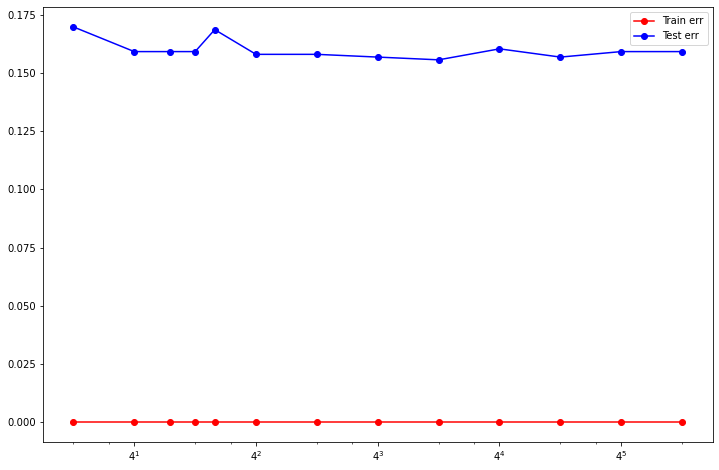

In [425]:
plot_forest_results(results_for_extremely_randomized_forests, n_estimators)

# AdaBoost

In [426]:
def try_n_adaboost(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.AdaBoostClassifier(n_estimators = n_estimators)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test)

In [427]:
n_estimators = [2, 4, 6, 8, 10, 16, 32, 64, 128, 256, 512, 1024, 2048]

results_for_adaboost = [try_n_adaboost(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

In [428]:
print_forest_results(results_for_adaboost, n_estimators)

[(0.14988198269079464, 0.15330188679245282), (0.14712824547600314, 0.1509433962264151), (0.14280094413847363, 0.15566037735849056), (0.14240755310778913, 0.1544811320754717), (0.14476789929189615, 0.15683962264150944), (0.14044059795436664, 0.14858490566037735), (0.14044059795436664, 0.15683962264150944), (0.13571990558615263, 0.1544811320754717), (0.13414634146341464, 0.1580188679245283), (0.12785208497246262, 0.15919811320754718), (0.12037765538945712, 0.16391509433962265), (0.11408339889850512, 0.16981132075471697), (0.10857592446892211, 0.18632075471698112)]

Лучшее количество деревьев 16, соответствующая ошибка на обучающей выборке 0.14044059795436664, тестовой 0.14858490566037735


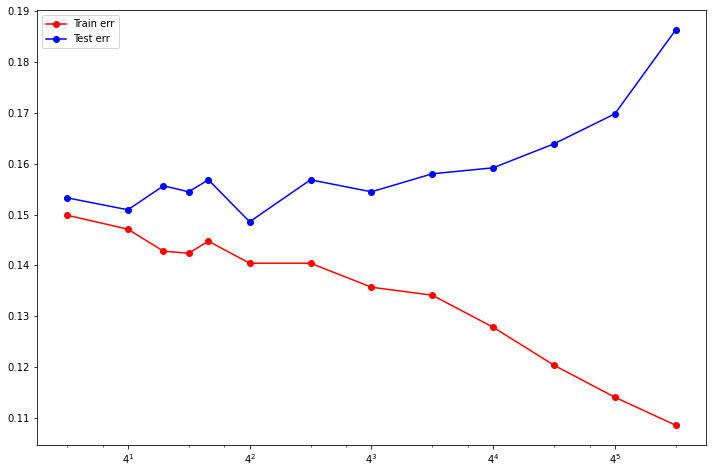

In [429]:
plot_forest_results(results_for_adaboost, n_estimators)

На примере алгоритма AdaBoost, с ростом количества деревьев от 16 и выше наблюдается переобучение.  Ошибка на тестовой выборке растет, на обучающей же выборке стремится к нулю.

# GBT

In [430]:
def try_n_gbt(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test)

In [431]:
n_estimators = [2, 4, 6, 8, 10, 16, 32, 64, 128, 256, 512, 1024, 2048]

results_for_gbt = [try_n_gbt(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

In [432]:
print_forest_results(results_for_gbt, n_estimators)

[(0.14988198269079464, 0.15330188679245282), (0.14988198269079464, 0.15330188679245282), (0.14791502753737215, 0.15330188679245282), (0.14555468135326516, 0.1544811320754717), (0.14398111723052714, 0.1509433962264151), (0.13965381589299763, 0.1544811320754717), (0.13296616837136113, 0.15919811320754718), (0.12470495672698663, 0.16273584905660377), (0.11408339889850512, 0.1650943396226415), (0.09166011014948859, 0.16627358490566038), (0.05507474429583006, 0.16981132075471697), (0.010228166797797011, 0.18396226415094338), (0.0, 0.19103773584905662)]

Лучшее количество деревьев 10, соответствующая ошибка на обучающей выборке 0.14398111723052714, тестовой 0.1509433962264151


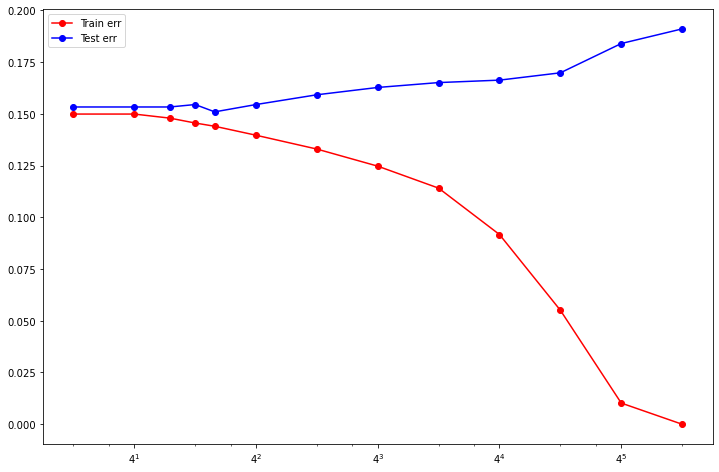

In [433]:
plot_forest_results(results_for_gbt, n_estimators)

# Вывод

Метод GBT относительно прредыдущего метода при небольшом количестве деревьев (10) выдает довольно таки не плохой результат. В начале наблюдаем ассимптотическое приближение ошибок на тестовой и обучающей выборках, но с увеличением количества деревьев ошибка на тестовой выборке начинает расти, на обучающей падать, что свидетельствует о переобучении.

Подводя итог, на мой взгляд метод нейронных сетей наиболее оптимальен: эффективная ошибка на тестовой выборке достигает 0.1450471, за счет однослойной нейронной сети (при alpha > 5.6), сотоящей из 30  нейроннов


# PCA - метод главных компонент

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, svd_solver='arpack')
pca_train = pca.fit_transform(X_train)
pca_test = pca.fit_transform(X_test)
pca

PCA(n_components=5, svd_solver='arpack')

In [97]:
print(pca_train.shape)

(2542, 5)


In [107]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (550,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 32)
mlp_model.fit(pca_train, y_train)
y_train_pred = mlp_model.predict(pca_train)
y_test_pred = mlp_model.predict(pca_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.14673485444531864 0.15212264150943397


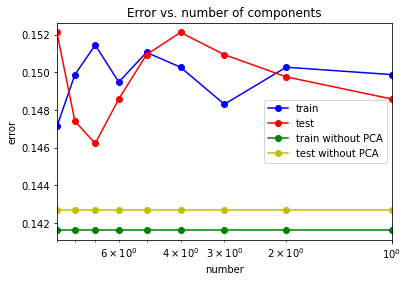

In [109]:
mlp_model = MLPClassifier(hidden_layer_sizes = (550,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_err_without_PCA=np.mean(y_train != y_train_pred)
test_err_without_PCA=np.mean(y_test != y_test_pred)


num_arr = [i+1 for i in range(9)]
train_err_PCA = []
test_err_PCA = []
test_err = []
train_err = []
for num in num_arr:
    pca = PCA(n_components=int(num))
    pca_train = pca.fit_transform(X_train)
    pca_test = pca.fit_transform(X_test)
    
    mlp_model = MLPClassifier(hidden_layer_sizes = (550,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
    mlp_model.fit(pca_train, y_train)

    y_train_pred = mlp_model.predict(pca_train)
    y_test_pred = mlp_model.predict(pca_test)

    train_err_PCA.append(np.mean(y_train != y_train_pred))
    test_err_PCA.append(np.mean(y_test != y_test_pred))
    train_err.append(train_err_without_PCA)
    test_err.append(test_err_without_PCA)
    
plt.semilogx(num_arr, train_err_PCA, 'b-o', label = 'train')
plt.semilogx(num_arr, test_err_PCA, 'r-o', label = 'test')
plt.semilogx(num_arr, train_err, 'g-o', label = 'train without PCA')
plt.semilogx(num_arr, test_err, 'y-o', label = 'test without PCA')
plt.xlim([np.max(num_arr), np.min(num_arr)])
plt.title('Error vs. number of components')
plt.xlabel('number')
plt.ylabel('error')
plt.legend()
pass

####  Из графика видно, что применение PCA не улучшает результатов обучения